In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../Data/cleaned_train.csv")

In [22]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Occupation", "Spending_Behaviour", "Paying_Behaviour"], axis=1)

df["Credit_Score"] = df["Credit_Score"].map({"Good":2, "Standard":1, "Poor":0})

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [24]:
from keras.utils import to_categorical


X_reshaped = X_scaled.reshape(len(X_scaled), 3, 7, 1)
y_one_hot = to_categorical(y)

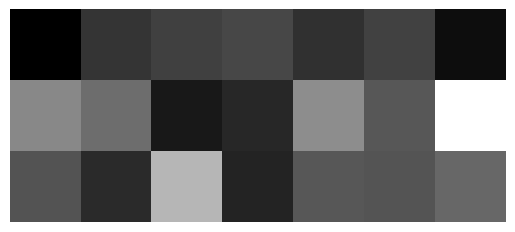

In [25]:
import matplotlib.pyplot as plt


image = X_reshaped[0].reshape(3, 7)  # Reshape back to 2D for visualization

plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_reshaped, y_one_hot, test_size=0.2, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [110]:
batch_size = 64
epochs = 100
num_classes = 3

In [112]:
from keras.layers import InputLayer,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

modeld = Sequential()
modeld.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(3,7,1)))
modeld.add(MaxPooling2D((3, 3),padding='same'))
modeld.add(Dropout(0.25))
modeld.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
modeld.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
modeld.add(Dropout(0.25))
modeld.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
modeld.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
modeld.add(Dropout(0.4))
modeld.add(Flatten())
modeld.add(Dense(128, activation='relu'))
modeld.add(Dropout(0.3))
modeld.add(Dense(64, activation='relu'))
modeld.add(Dropout(0.2))
modeld.add(Dense(32, activation='relu'))
modeld.add(Dropout(0.1))
modeld.add(Dense(num_classes, activation='softmax'))


In [102]:
modeld.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)              │ (None, 3, 7, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 1, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 1, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,619 (467.26 KB)

 Trainable params: 119,619 (467.26 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
modeld.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [114]:
early_stopping = EarlyStopping(monitor='val_loss',  # Can also monitor 'val_accuracy'
                               patience=10,  # Number of epochs to wait for improvement
                               restore_best_weights=True)


In [115]:
results=modeld.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5676 - loss: 0.8954 - val_accuracy: 0.6669 - val_loss: 0.7154
Epoch 2/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6631 - loss: 0.7325 - val_accuracy: 0.6758 - val_loss: 0.7093
Epoch 3/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6766 - loss: 0.7143 - val_accuracy: 0.6816 - val_loss: 0.6927
Epoch 4/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6773 - loss: 0.7118 - val_accuracy: 0.6902 - val_loss: 0.6818
Epoch 5/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6810 - loss: 0.7018 - val_accuracy: 0.6910 - val_loss: 0.6781
Epoch 6/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6836 - loss: 0.6957 - val_accuracy: 0.6918 - val_loss: 0.6728
Epoch 7/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6855 - loss: 0.6897 - val_accuracy: 0.6885 - val_loss: 0.6725
Epoch 8/100
831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6868 - loss: 0.6885 - val_accu

In [91]:
test_eval = modeld.evaluate(X_test, y_test)
test_eval

554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6995 - loss: 0.6606


[0.6595447063446045, 0.6999830603599548]

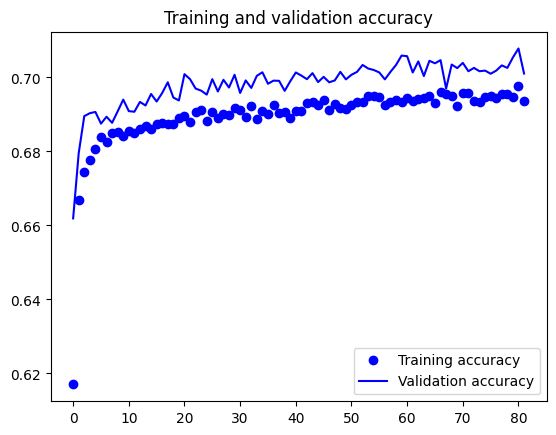

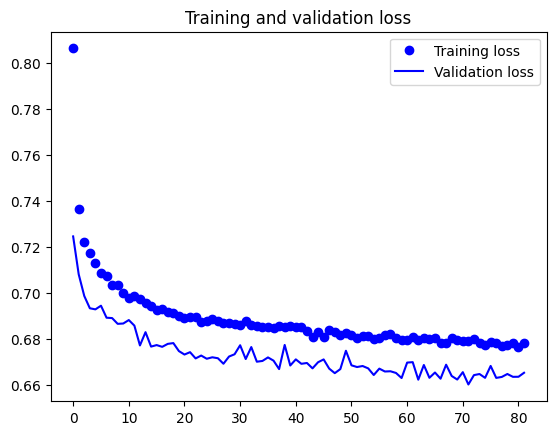

In [92]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [94]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes


array([0, 2, 1, ..., 0, 0, 0], dtype=int64)

In [98]:
dfr = pd.DataFrame({
    'Actual': np.argmax(y_test,axis=1),
    'Predicted': predicted_classes
})

In [99]:
dfr

,Actual,Predicted
0,1,0
1,2,2
2,1,1
3,1,1
4,0,1
...,...,...
17714,1,1
17715,2,2
17716,1,0
17717,1,0
